In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.image as matimg
import matplotlib.pyplot as plt

In [4]:
img_dir='imgs/'

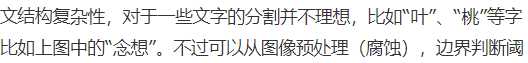

In [22]:
img_filename='cut_test_03.png'
# img_filename='zh.jpg'
img=Image.open(img_dir+img_filename)
# img=img.convert('L')
# img.save(train_data_dir+ img_filename.split('.')[0]+ '_gray.png')

raw=np.array(img)
data = cv2.cvtColor(raw,cv2.COLOR_BGR2GRAY)
_, data = cv2.threshold(data,127,255,cv2.THRESH_BINARY)
img

In [27]:
count=np.zeros(data.shape,dtype=np.uint8)
l = []
_ = 0
for i in range(data.shape[0]):
    t = sum(map(lambda x: 0 if x == 255 else 1, data[i]))
    if t > 0 and _ == 0:
        l.append(i)
    elif t == 0 and _ > 0:
        l.append(i)
    _ = t
    count[i,:t]=255
if _ != 0:
    l.append(data.shape[0] - 1)
hcnt_img = Image.fromarray(count)

line_data=[]
for i in range(len(l) // 2):
    line_data.append(data[l[2 * i]:l[2 * i + 1],:])
#     plt.subplot(len(l) // 2, 1, i + 1)
#     plt.imshow(Image.fromarray(line_data[-1]), cmap='gray')

In [24]:
cnt=0
for i in line_data:
    Image.fromarray(i).save('cut_method/'+img_filename.split('.')[0]+f'_{cnt}.png')
    cnt+=1

In [24]:
hcnt_img.save('../zl/切割_行分布.jpg')

(-0.5, 527.5, 62.5, -0.5)

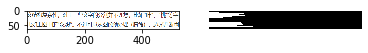

In [28]:
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.imshow(hcnt_img,cmap='gray')
plt.axis('off')

In [29]:
line = line_data[0]
count = np.zeros(line.shape, dtype=np.uint8)
w = []
_ = 0
for i in range(line.shape[1]):
    t = sum(map(lambda x: 0 if x == 255 else 1, line[:, i]))
    if t > 0 and _ == 0:
        w.append(i)
    elif t == 0 and _ > 0:
        w.append(i)
    _ = t
    count[:t, i] = 255
if _ != 0:
    w.append(line.shape[1] - 1)

vcnt_img=Image.fromarray(count)
vcnt_img

In [30]:
vcnt_img.save('切割_字符分布2.jpg')

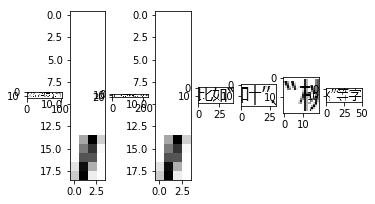

In [39]:
word_data = []
for i in range(len(w) // 2):
    word_data.append(line[:, w[2 * i]:w[2 * i + 1]])
    plt.subplot(1, len(w) // 2, i + 1)
    Image.fromarray(word_data[-1]).save(f'../zl/切割_字符{i}.jpg')
    plt.imshow(Image.fromarray(word_data[-1]), cmap='gray')
Image.fromarray(word_data[2])

(-0.5, 527.5, 18.5, -0.5)

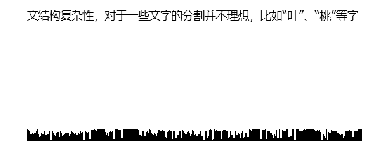

In [23]:
plt.subplot(211)
plt.imshow(Image.fromarray(line_data[0]),cmap='gray')
plt.axis('off')
plt.subplot(212)
plt.imshow(vcnt_img,cmap='gray')
plt.axis('off')